## Introduction

## Problem Statement
Analyse and Forecast Time Series data of Bangladesh GDP per capita growth (annual %). The data has been downloaded from worldbank. source:https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG?locations=BD

In [217]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Loading Dataset
### Loading

In [218]:
Bangladesh_GDP=pd.read_csv('G:\\ASDS\\New folder (2)\\Time Series Analysis\\Bangladesh GDP History.csv',parse_dates=['Year'],index_col='Year')

In [219]:
Bangladesh_GDP.head()

,GDP ( Billions in USD)
Year,
2023-01-01,446.349
2022-01-01,460.751
2021-01-01,416.260
2020-01-01,373.900
2019-01-01,351.240


### Looking into Dataset

In [221]:
Bangladesh_GDP.info(), Bangladesh_GDP.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2023-01-01 to 1972-01-01
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GDP ( Billions in USD)  52 non-null     float64
dtypes: float64(1)
memory usage: 832.0 bytes


(None,
        GDP ( Billions in USD)
 count               52.000000
 mean               100.646923
 std                124.726443
 min                  6.290000
 25%                 21.390000
 50%                 49.110000
 75%                118.620000
 max                460.751000)

In [188]:
Bangladesh_GDP['GDP ( Billions in USD)'].values

array([446.349, 460.751, 416.26 , 373.9  , 351.24 , 321.38 , 293.75 ,
       265.24 , 195.08 , 172.89 , 149.99 , 133.36 , 128.64 , 115.28 ,
       102.48 ,  91.63 ,  79.61 ,  71.82 ,  69.44 ,  65.11 ,  60.16 ,
        54.72 ,  53.99 ,  53.37 ,  51.27 ,  49.98 ,  48.24 ,  46.44 ,
        37.94 ,  33.77 ,  33.17 ,  31.71 ,  30.96 ,  31.6  ,  28.78 ,
        26.58 ,  24.3  ,  21.77 ,  22.28 ,  18.92 ,  17.61 ,  18.53 ,
        20.25 ,  18.14 ,  15.57 ,  13.28 ,   9.65 ,  10.12 ,  19.45 ,
        12.51 ,   8.09 ,   6.29 ])

<Axes: xlabel='Year'>

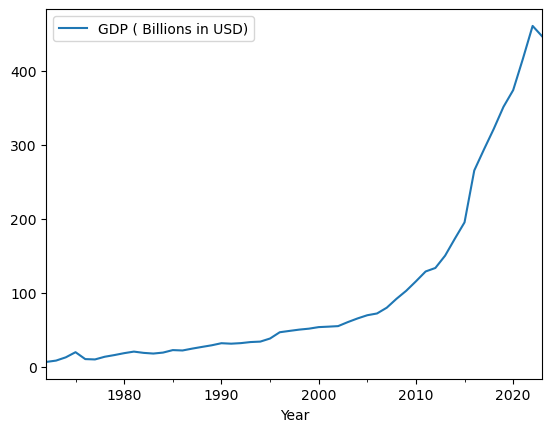

In [158]:
Bangladesh_GDP.plot()

## Time Series Analysis
At first a graph has been plotted to visualize the time series distribution of the GDP growth data over the year

<Axes: xlabel='Year'>

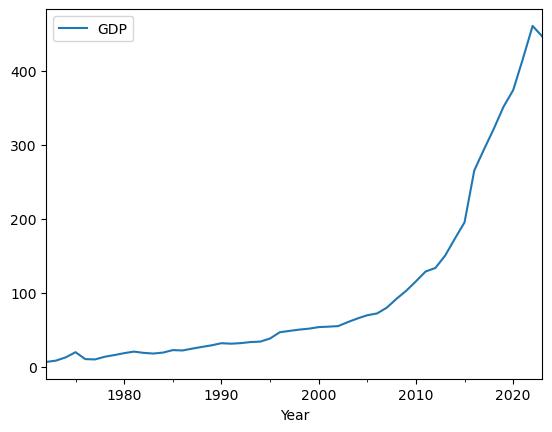

In [12]:
BD_GDP=Bangladesh_GDP.rename(columns={'GDP ( Billions in USD)':'GDP'})
BD_GDP.plot()

We can not clearly observe seasonality and positive trend in the above graph. There may be a positive growth trend in the graph.If the trend is increasing then the mean is not constant.

So, the first goal here is to make the time series into stationary.

### Performing kde plot

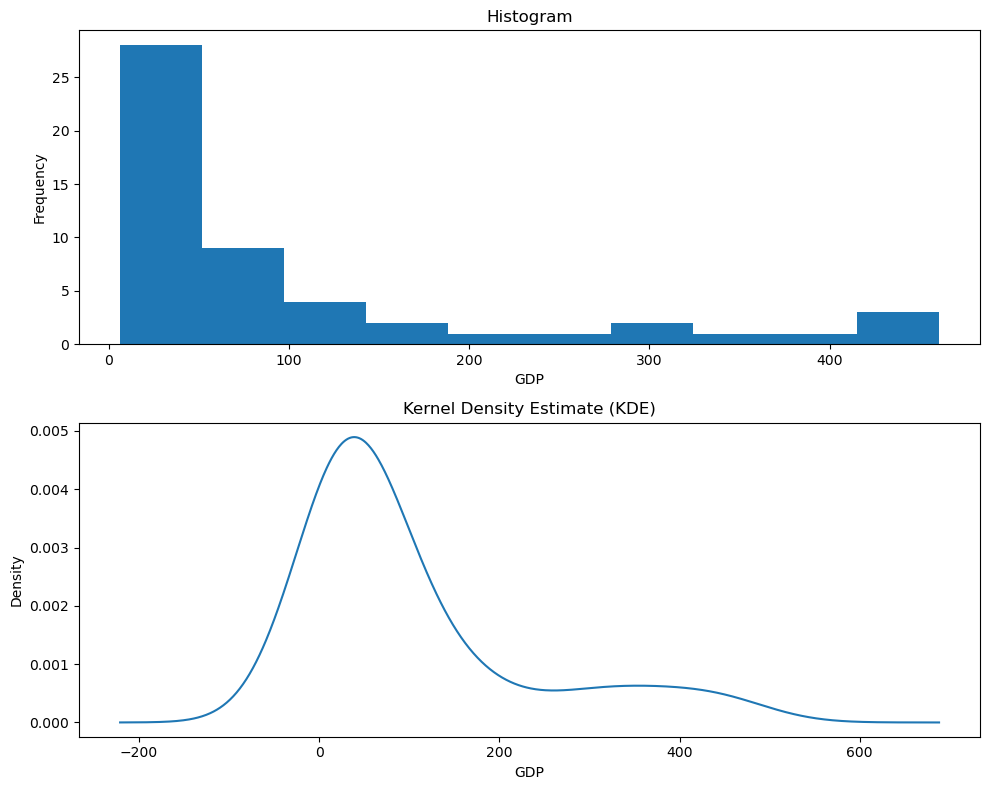

In [222]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
BD_GDP['GDP'].plot(kind='hist', ax=axes[0], title='Histogram')
axes[0].set_xlabel('GDP')
axes[0].set_ylabel('Frequency')

# KDE
BD_GDP['GDP'].plot(kind='kde', ax=axes[1], title='Kernel Density Estimate (KDE)')
axes[1].set_xlabel('GDP')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

From the above graph, it can be observed that the Kernel Density Estimate (KDE) plot indicates that GDP values tend to cluster around a non-zero mean. In simpler terms, this implies that the average GDP is not constant and undergoes changes over the observed period.<p>
The positive trend and non-zero mean in the data signal a shifting economic environment. To enhance the reliability of our analysis, potential solutions include the application of differencing or log transformation.<p>

There are many tests to check whether a time series is stationary or not.<p> But we will use -
1.Rolling statistics (Visual test)<p>
2.ACF and PACF Graph(Visual Test)<p>
3.Dickey Fuller test

#### ACF and PACF Graph

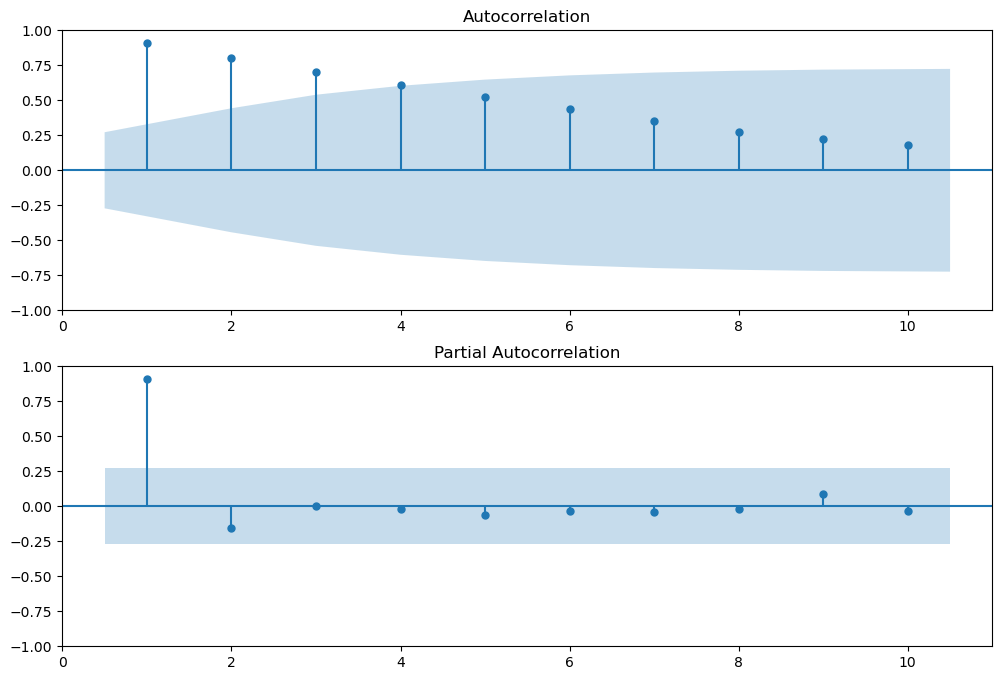

In [223]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8)) 
plot_acf(BD_GDP, lags=10, zero=False, ax=ax1)# Plot the ACF of df
plot_pacf(BD_GDP, lags=10, zero=False, ax=ax2)# Plot the PACF of df
plt.show()

The ACF (Autocorrelation Function) graph shows a gradual decline, indicating a positive correlation between the time series data and its lags. The PACF (Partial Autocorrelation Function) graph has a significant spike at lag 1, suggesting that most of the autocorrelation can be explained by the direct relationship between each observation and its immediate predecessor 

#### Rolling Statistics

Text(0.5, 1.0, 'Rolling Mean and Standard deviation\n')

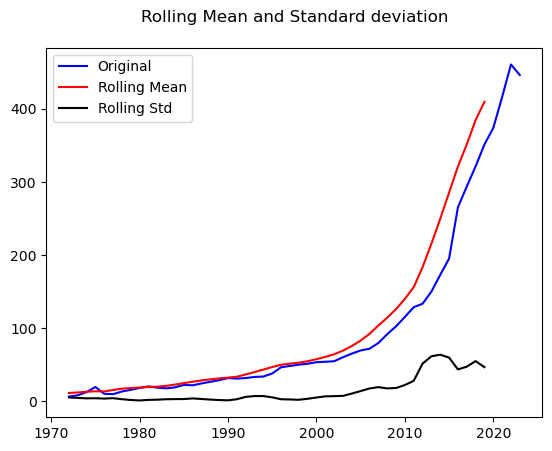

In [225]:
rolmean = BD_GDP.rolling(window=5).mean() # selecting window 125
rolstd = BD_GDP.rolling(window=5).std()
plt.plot(BD_GDP, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard deviation\n')

 All three lines are relatively flat and close together from 1970 until around 2005, where they begin to diverge significantly. The “Original” line shows a sharp increase around this point, indicating a rapid growth or spike in the data values. The “Rolling Mean” and “Rolling Std” lines also increase but at a more gradual rate<p>
    A plot of rolling statistics can be helpful in identifying trends and assessing volatility in the time series. If the rolling mean and standard deviation remain relatively constant, it suggests that the time series may be stationary. As it can be observed that the mean and std is not stationary, we can say that our data may not be stationary. But we need further statistical verification.

#### Augmented Dickey-Fuller (ADF)
The ADF (Augmented Dickey-Fuller) test is a statistical test that checks whether a time series is stationary or not. The null hypothesis of the test is that the time series has a unit root, which means it is non-stationary. The alternative hypothesis is that the time series is stationary 1.<p>
    If the p-value is greater than the significance level or if the test statistic is greater than the critical value, the decision is to fail to reject the null hypothesis. Because the data do not provide evidence that the data are stationary, the recommendation of the analyis is to determine whether differencing makes the mean of the data stationary.


In [16]:
BD_GDP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2023-01-01 to 1972-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     52 non-null     float64
dtypes: float64(1)
memory usage: 832.0 bytes


In [226]:
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(BD_GDP['GDP'])


print('test statistic:',adf_test[0])
print('p-value:',adf_test[1])
adf_test

test statistic: -6.199289465964964
p-value: 5.8605439029693e-08


(-6.199289465964964,
 5.8605439029693e-08,
 5,
 46,
 {'1%': -3.5812576580093696,
  '5%': -2.9267849124681518,
  '10%': -2.6015409829867675},
 205.24179051732446)


The ADF test returns a test statistic and a p-value. The test statistic is a negative number, and the more negative it is, the stronger the evidence against the null hypothesis. The p-value is a measure of the evidence against the null hypothesis. A small p-value (less than 0.05) indicates strong evidence against the null hypothesis, and we can reject the null hypothesis in favor of the alternative hypothesis 1.<p>

In our case, the ADF test statistic is **-6.199** and the p-value is **5.86e-08**. Since the p-value is much smaller than 0.05, we can reject the null hypothesis and conclude that the time series is stationary 

In [227]:
order_aic_bic=[]

# Loop over p values from 0-5
for p in range(5):
  # Loop over q values from 0-5
    for q in range(5):
      	# create and fit ARMA(p,q) model
        model = ARIMA(BD_GDP, order=(p,0,q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic,results.bic))


# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provid

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provid

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provid

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provid

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    p  q         AIC         BIC
22  4  2  412.105939  427.715889
23  4  3  413.069464  430.630657
19  3  4  415.164705  432.725899
11  2  1  415.761497  425.517716
24  4  4  416.592701  436.105139
20  4  0  416.625911  428.333373
12  2  2  417.706698  429.414160
21  4  1  417.966624  431.625330
15  3  0  419.559470  429.315689
8   1  3  419.567353  431.274815
17  3  2  419.722704  433.381410
10  2  0  420.560914  428.365889
9   1  4  420.716980  434.375686
13  2  3  420.756378  434.415084
14  2  4  422.156461  437.766411
18  3  3  422.357540  437.967489
16  3  1  424.529772  436.237235
7   1  2  430.889972  440.646191
6   1  1  431.415933  439.220908
5   1  0  451.626755  457.480486
4   0  4  488.397173  500.104636
3   0  3  505.957049  515.713268
2   0  2  540.349252  548.154227
1   0  1  590.225633  596.079364
0   0  0  652.476647  656.379134
    p  q         AIC         BIC
11  2  1  415.761497  425.517716
22  4  2  412.105939  427.715889
20  4  0  416.625911  428.333373
10  2  0  

## Model 1
For this model we are taking the time series data stationary as suggested by ADF test and it has the AIC of 412.105939   and BIC of 427.715889 where p and q are 4 and 2

In [228]:
##(4,0,2)
# Fit model
model = ARIMA(BD_GDP, order=(4,0,2))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))
print('Mean Absolte Error:',mae)
mse = np.mean((results.resid)**2)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provid

Mean Absolte Error: 13.5284537047901
Mean Squared Error (MSE): 2426.5098557892647
Root Mean Squared Error (RMSE): 49.25961688634276


Based on the results, the Mean Absolute Error (MAE) of your model is 13.53, the Mean Squared Error (MSE) is 2426.51, and the Root Mean Squared Error (RMSE) is 49.26. These metrics are commonly used to evaluate the performance of regression models. The MAE measures the average absolute difference between the predicted and actual values, the MSE measures the average squared difference between the predicted and actual values, and the RMSE is the square root of the MSE .

The lower the values of these metrics, the better the performance of the model.

### Model1_residuals

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   52
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -198.053
Date:                Wed, 20 Dec 2023   AIC                            412.106
Time:                        23:19:45   BIC                            427.716
Sample:                             0   HQIC                           418.090
                                 - 52                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.7080    201.570      0.500      0.617    -294.363     495.779
ar.L1          0.8025      0.094      8.498      0.000       0.617       0.988
ar.L2          0.1457      0.146      0.996      0.3

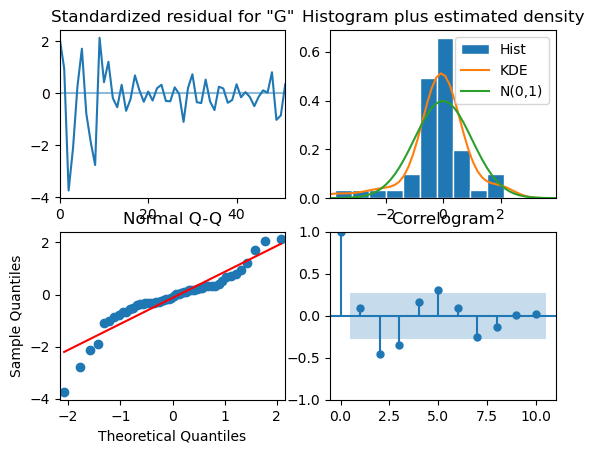

In [235]:
print(results.summary())
results.plot_diagnostics()
plt.show()

The Ljung-Box (L1) (Q) test statistic is a measure of autocorrelation in the residuals at lag 1. In this case, the LBQ test statistic at lag 1 is 0.05, and the p-value is 0.82. Since the probability is above 0.05, we cannot reject the null hypothesis that the errors are white noise 1.

The White’s test is used to test for heteroscedasticity in the residuals. The test statistic is 0.03, and the p-value is 0.00. Since the p-value is less than 0.05, we reject the null hypothesis that the residuals are homoscedastic and conclude that the residuals show variance 2.

The Jarque-Bera test is a test for normality of the residuals. The test statistic is 149.78, and the probability is 0. Since the probability is less than 0.05, we reject the null hypothesis that the residuals are normally distributed and conclude that the residuals are not normally distributed. The distribution has a slight negative skew and a large kurtosis

### Model1_forecasting
This code applies exponential smoothing to a time series data and generates a forecast for future values. The code first defines the time series data as ts. It then applies exponential smoothing to the data using the ExponentialSmoothing function from the statsmodels.tsa.holtwinters module. The trend parameter is set to ‘mul’ to indicate that the model should include a multiplicative trend component. The fit_model variable stores the fitted model. The forecast variable stores the forecasted values for the next 8 periods. Finally, the code plots the actual data, the fitted values, and the forecasted values using the plot function from the matplotlib.pyplot module 1.

In [240]:
df1=BD_GDP
df1.sort_index(inplace=True)


In [239]:
forecast

2024-01-01    487.816437
2025-01-01    529.500752
2026-01-01    574.747025
2027-01-01    623.859630
2028-01-01    677.168947
2029-01-01    735.033589
2030-01-01    797.842813
2031-01-01    866.019136
Freq: AS-JAN, dtype: float64

## Model 2
For this model we are taking the time series data stationary as suggested by ADF test and it has the AIC of 415.761497     and BIC of 425.517716 where p and q are 2 and 1

In [255]:
# Fit model
model2 = ARIMA(BD_GDP, order=(2,0,1))
results2 = model2.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results2.resid))
print('Mean Absolte Error:',mae)
mse = np.mean((results2.resid)**2)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Absolte Error: 8.597149155237918
Mean Squared Error (MSE): 598.8999095638876
Root Mean Squared Error (RMSE): 24.472431623438805


These metrics are commonly used to evaluate the performance of regression models. The MAE measures the average absolute difference between the predicted and actual values, the MSE measures the average squared difference between the predicted and actual values, and the RMSE is the square root of the MSE. The lower the values of these metrics, the better the performance of the model.<p>
    
    Comparing the two models, we can see that model 2 has lower values of MAE, MSE, and RMSE than model 1. This indicates that model 2 has better performance than model 1 in terms of predicting the values of the time series data. 

### Model2_residuals

The SARIMAX Results table provides information about the statistical model that was used to analyze the time series data. The table includes the model’s parameters, standard errors, z-scores, and p-values. The p-values are used to test the null hypothesis that the coefficients are equal to zero. If the p-value is less than the significance level (usually 0.05), we can reject the null hypothesis and conclude that the coefficient is statistically significant.<p>
   **Determine Term Significance(second part of the result)**: The null for this section is that each coefficient is NOT statistically significant. Therefore, we want each term to have a p-value of less than 0.05, so we can reject the null hypothesis with statistically significant values.

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   52
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -202.881
Date:                Wed, 20 Dec 2023   AIC                            415.761
Time:                        23:54:36   BIC                            425.518
Sample:                    01-01-1972   HQIC                           419.502
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        163.3962    214.399      0.762      0.446    -256.819     583.611
ar.L1          1.9531      0.120     16.285      0.000       1.718       2.188
ar.L2         -0.9587      0.125     -7.640      0.0

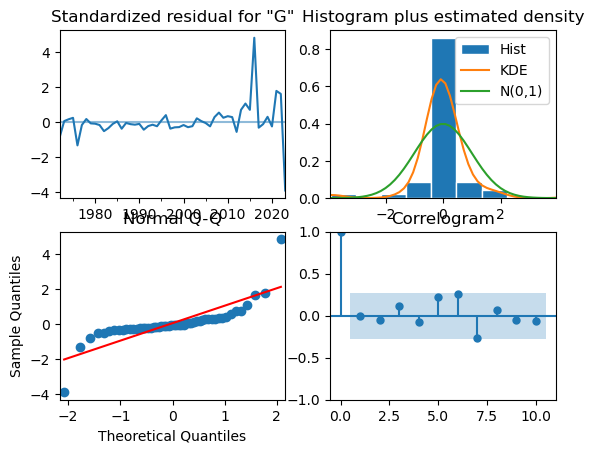

In [245]:
print(results2.summary())
results2.plot_diagnostics()
plt.show()

This is the result of a SARIMAX model that was used to analyze a time series data with 52 observations. The model has an order of (2, 0, 1), which means that it has 2 autoregressive (AR) terms, 0 differences, and 1 moving average (MA) term. The Log Likelihood of the model is -202.881, and the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are 415.761 and 425.518, respectively. The Ljung-Box (L1) value of the model is 0.00, which is not significant at the 5% level, indicating that there is no autocorrelation in the residuals at lag 1. The model has a Jarque-Bera (JB) value of 334.31, which is significant at the 5% level, indicating that the residuals are not normally distributed. The distribution has a slight positive skew and a large kurtosis. The model also has a Heteroskedasticity (H) value of 15.16, which is significant at the 5% level, indicating that the residuals are heteroskedastic .

Comparing the residuals of model 1 and model 2, we can see that the residuals of model 2 are smaller than the residuals of model 1. This indicates that model 2 is better at capturing the information in the data than model 1.

In [246]:
#help(forecast)

In [ ]:
# Assuming BD_GDP is your DataFrame with GDP data
#df['Year'] = pd.to_datetime(df['Year'])
#df.set_index('Year', inplace=True)


## forecasting
This code applies exponential smoothing to a time series data and generates a forecast for future values. The code first defines the time series data as ts. It then applies exponential smoothing to the data using the ExponentialSmoothing function from the statsmodels.tsa.holtwinters module. The trend parameter is set to ‘mul’ to indicate that the model should include a multiplicative trend component. The fit_model variable stores the fitted model. The forecast variable stores the forecasted values for the next 8 periods. Finally, the code plots the actual data, the fitted values, and the forecasted values using the plot function from the matplotlib.pyplot module 1.

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


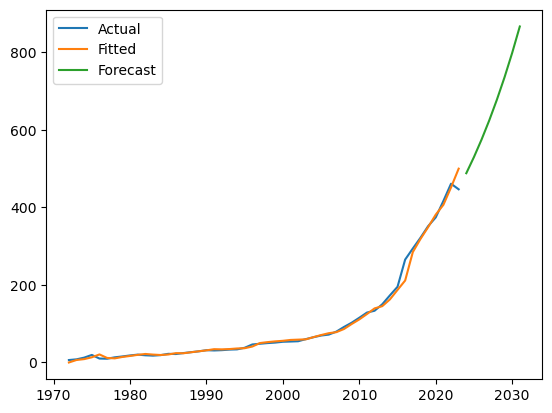

In [253]:
df1=BD_GDP
df1.sort_index(inplace=True)

ts1=df1.GDP
# Apply exponential smoothing without seasonality
model = ExponentialSmoothing(ts1, trend='mul')
fit_model = model.fit()

# Forecast future values
forecast = fit_model.forecast(steps=8)


# Plot the results
plt.plot(ts1, label='Actual')
plt.plot(fit_model.fittedvalues, label='Fitted')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [254]:
forecast

2024-01-01    487.816437
2025-01-01    529.500752
2026-01-01    574.747025
2027-01-01    623.859630
2028-01-01    677.168947
2029-01-01    735.033589
2030-01-01    797.842813
2031-01-01    866.019136
Freq: AS-JAN, dtype: float64